In [103]:
import os
import numpy as np
import tensorflow as tf
from sklearn.cluster import KMeans

In [104]:
import matplotlib.pyplot as plt


In [105]:
image_dir = './images'
image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir)]

In [106]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)
model = tf.keras.Model(inputs=base_model.input, outputs=base_model.layers[-1].output)


C:\Users\kev70\AppData\Local\Temp\ipykernel_8612\4090394508.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)


In [120]:
features = []
for path in image_paths:
    print(path)
    img = tf.keras.preprocessing.image.load_img(path, target_size=(224,224))
    # print(f"img: {img}")
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    # print(f"img_array_1: {img_array}")
    img_array = tf.keras.applications.mobilenet.preprocess_input(img_array)
    # print(f"img_array_2: {img_array}")
    img_array = np.expand_dims(img_array, axis=0)
    # print(f"img_array_3: {img_array}")
    feature_vector = model.predict(img_array)
    # print(f"feature_vector: {feature_vector}")
    features.append(feature_vector.flatten())

image_features = np.array(features)
# print(image_features)


./images\IMG_2439.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2440.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2443.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2447.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2448.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2449.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2450.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2451.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2452.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2453.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
feature_vector: (1, 7, 7, 1280)
./images\IMG_2454.JPG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
feature_vecto

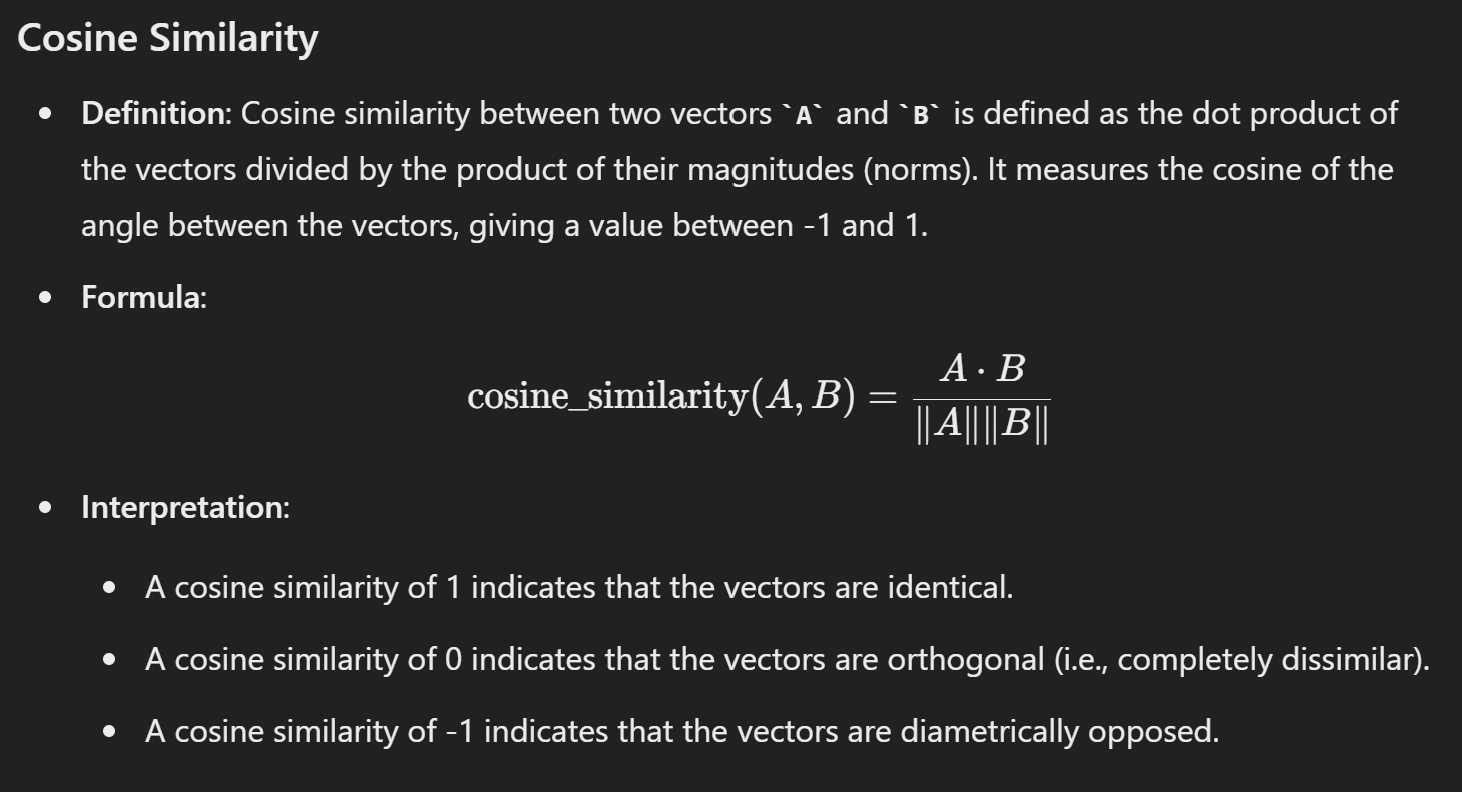

In [116]:
similarity_matrix = np.dot(image_features, image_features.T)
similarity_matrix

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.16732073 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(62720, 11)


array([[ 95478.26 ,  52927.484,  49800.69 ,  42625.348,  42390.145,
         35993.137,  33204.27 ,  42655.387,  25334.844,  48805.004,
         48019.58 ],
       [ 52927.484,  65923.62 ,  41929.855,  30449.498,  29837.803,
         24495.59 ,  22605.463,  39088.613,  24482.145,  32536.908,
         32395.639],
       [ 49800.69 ,  41929.855,  86141.555,  41312.38 ,  41769.316,
         35910.312,  34677.836,  39469.227,  20380.08 ,  45494.117,
         46377.207],
       [ 42625.348,  30449.498,  41312.38 , 109175.77 ,  89947.195,
         62130.055,  54327.26 ,  29757.71 ,  14953.324,  48067.89 ,
         50201.387],
       [ 42390.145,  29837.803,  41769.316,  89947.195, 111887.51 ,
         65777.13 ,  60373.996,  31301.947,  15995.338,  50624.117,
         52502.543],
       [ 35993.137,  24495.59 ,  35910.312,  62130.055,  65777.13 ,
        103904.83 ,  78666.805,  27030.754,  13241.955,  52507.156,
         54199.297],
       [ 33204.27 ,  22605.463,  34677.836,  54327.26 ,  6

In [6]:
norms = np.linalg.norm(image_features, axis = 1)
norms

array([308.99554, 256.75595, 293.49875, 330.41754, 334.49594, 322.34265,
       313.43405, 303.3623 , 219.16391, 371.09714, 359.2737 ],
      dtype=float32)

In [7]:
similarity_matrix = similarity_matrix/np.outer(norms,norms)
similarity_matrix

array([[1.0000001 , 0.667127  , 0.54913217, 0.4174963 , 0.41013026,
        0.361368  , 0.3428432 , 0.45505098, 0.374108  , 0.42562246,
        0.43255433],
       [0.667127  , 1.        , 0.55641216, 0.35891905, 0.34742054,
        0.2959713 , 0.28089675, 0.5018433 , 0.43507078, 0.34148228,
        0.35118875],
       [0.54913217, 0.55641216, 1.0000005 , 0.42600125, 0.4254615 ,
        0.37957287, 0.37696373, 0.4432929 , 0.31683314, 0.417697  ,
        0.4398179 ],
       [0.4174963 , 0.35891905, 0.42600125, 1.0000002 , 0.81382996,
        0.5833388 , 0.5245761 , 0.2968758 , 0.20649312, 0.39201653,
        0.42288977],
       [0.41013026, 0.34742054, 0.4254615 , 0.81382996, 0.99999976,
        0.6100513 , 0.57585466, 0.3084742 , 0.21818934, 0.40782985,
        0.43688187],
       [0.361368  , 0.2959713 , 0.37957287, 0.5833388 , 0.6100513 ,
        1.0000005 , 0.7786236 , 0.27642593, 0.1874413 , 0.43894804,
        0.46800494],
       [0.3428432 , 0.28089675, 0.37696373, 0.5245761 , 0.

In [92]:
num_samples = image_features.shape[0]
num_clusters = 1
cluster_labels = np.zeros(num_samples, dtype=int)
similarity_threshold = 0.7

In [93]:
while True:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(image_features)
    print("num_clusters: ",num_clusters)
    avg_similarity_within_clusters = []
    for label in range(num_clusters):
        cluster_indices = np.where(labels == label)[0]
        print("cluster_indices: ",cluster_indices)
        if len(cluster_indices) > 1:
            print(similarity_matrix[np.ix_(cluster_indices, cluster_indices)])
            similarity_within_cluster = np.mean(similarity_matrix[np.ix_(cluster_indices, cluster_indices)])
            print("similarity_within_cluster: ",similarity_within_cluster)
            avg_similarity_within_clusters.append(similarity_within_cluster)
            print("avg_similarity_within_clusters: ",avg_similarity_within_clusters)

    if all(similarity >=similarity_threshold for similarity in avg_similarity_within_clusters):
        cluster_labels = labels
        break

    num_clusters += 1
    print("===========================")

print(cluster_labels, num_clusters)

num_clusters:  1
cluster_indices:  [ 0  1  2  3  4  5  6  7  8  9 10]
[[1.0000001  0.667127   0.54913217 0.4174963  0.41013026 0.361368
  0.3428432  0.45505098 0.374108   0.42562246 0.43255433]
 [0.667127   1.         0.55641216 0.35891905 0.34742054 0.2959713
  0.28089675 0.5018433  0.43507078 0.34148228 0.35118875]
 [0.54913217 0.55641216 1.0000005  0.42600125 0.4254615  0.37957287
  0.37696373 0.4432929  0.31683314 0.417697   0.4398179 ]
 [0.4174963  0.35891905 0.42600125 1.0000002  0.81382996 0.5833388
  0.5245761  0.2968758  0.20649312 0.39201653 0.42288977]
 [0.41013026 0.34742054 0.4254615  0.81382996 0.99999976 0.6100513
  0.57585466 0.3084742  0.21818934 0.40782985 0.43688187]
 [0.361368   0.2959713  0.37957287 0.5833388  0.6100513  1.0000005
  0.7786236  0.27642593 0.1874413  0.43894804 0.46800494]
 [0.3428432  0.28089675 0.37696373 0.5245761  0.57585466 0.7786236
  1.0000004  0.27342185 0.18935709 0.48413593 0.5010537 ]
 [0.45505098 0.5018433  0.4432929  0.2968758  0.3084742

In [41]:
print(f"Optimal Number of Clusters: {num_clusters}")

clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(image_paths[i])

for cluster_id, images in clusters.items():
    print(f"Cluster {cluster_id}: {images}")

Optimal Number of Clusters: 4
Cluster 2: ['./images\\IMG_2439.JPG', './images\\IMG_2440.JPG', './images\\IMG_2443.JPG']
Cluster 0: ['./images\\IMG_2447.JPG', './images\\IMG_2448.JPG', './images\\IMG_2449.JPG', './images\\IMG_2450.JPG']
Cluster 1: ['./images\\IMG_2451.JPG', './images\\IMG_2452.JPG']
Cluster 3: ['./images\\IMG_2453.JPG', './images\\IMG_2454.JPG']


Cluster 2: ['./images\\IMG_2439.JPG', './images\\IMG_2440.JPG', './images\\IMG_2443.JPG']


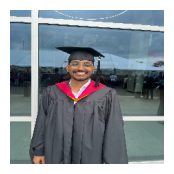

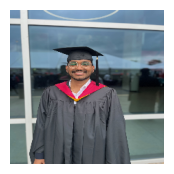

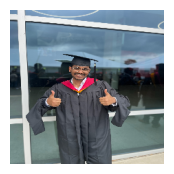

Cluster 0: ['./images\\IMG_2447.JPG', './images\\IMG_2448.JPG', './images\\IMG_2449.JPG', './images\\IMG_2450.JPG']


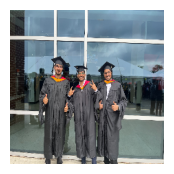

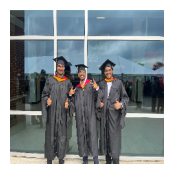

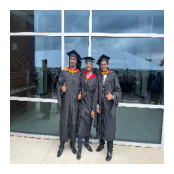

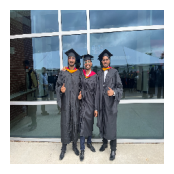

Cluster 1: ['./images\\IMG_2451.JPG', './images\\IMG_2452.JPG']


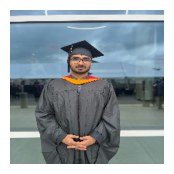

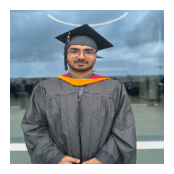

Cluster 3: ['./images\\IMG_2453.JPG', './images\\IMG_2454.JPG']


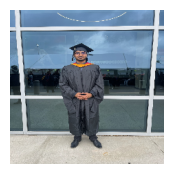

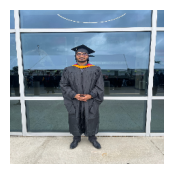

In [102]:
for cluster_id, images in clusters.items():
    print(f"Cluster {cluster_id}: {images}")
    for image in images:
        img = tf.keras.preprocessing.image.load_img(image, target_size=(224,224))
        plt.figure(figsize=(2,2))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

Cluster: 2


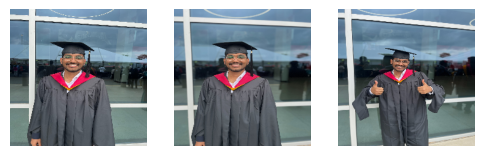

Cluster: 0


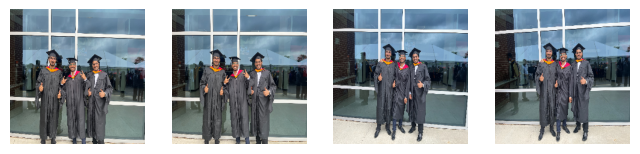

Cluster: 1


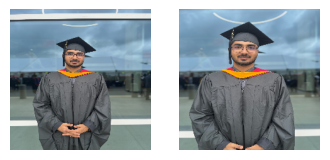

Cluster: 3


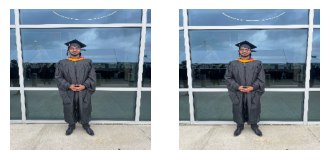

In [127]:
 # display view 2
def displayClusters2(clusters):
    for cluster_id, cluster_images in clusters.items():
        print(f"Cluster: {cluster_id}")
        num_images = len(cluster_images)
        fig, axs = plt.subplots(1, num_images, figsize=(num_images * 2, 2))
        if num_images == 1:  
            axs = [axs]

        for i, image in enumerate(cluster_images):
            img = tf.keras.preprocessing.image.load_img(image, target_size=(224, 224))
            axs[i].imshow(img)
            axs[i].axis('off')

        plt.show()

displayClusters2(clusters)